# Coin Change Problem


## Example: Spare Change Problem
Suppose we want to find the least amount of coins to return change for money in USD currency. The available coin values: [1,5,10,25]


### Recursion
* Base case: the change requested is equal to one of the values of the coins
* Recursive cases: For each subproblem, we want to figure out what the next coin will be. We want to find the solution that gives us the minimum number of coins.
* Time Complexity: $O(C^N)$
  * use of recursion to create a tree of possible solutions
  * each node correspond to a sub-solution
  * the branches correspond to the option to include a coin in the solution, the number of branches per node determines the base of the exponential function (C=5 for USD)  
  * the maximum depth of the tree is equal to the amount we're calculating for (N), which assumes the solution is change in all pennies
* Space Complexity: $O(N)$
  * you need to return an array of coins for the solution
  * worst case scenario, the solution is all pennies, so space required is N



$$
changeCoins = min\begin{Bmatrix}
len([1] + changeCoins(amount-1))\\
len([5] + changeCoins(amount-5))\\
len([10] + changeCoins(amount-10))\\
len([25] + changeCoins(amount-25))
\end{Bmatrix}
$$

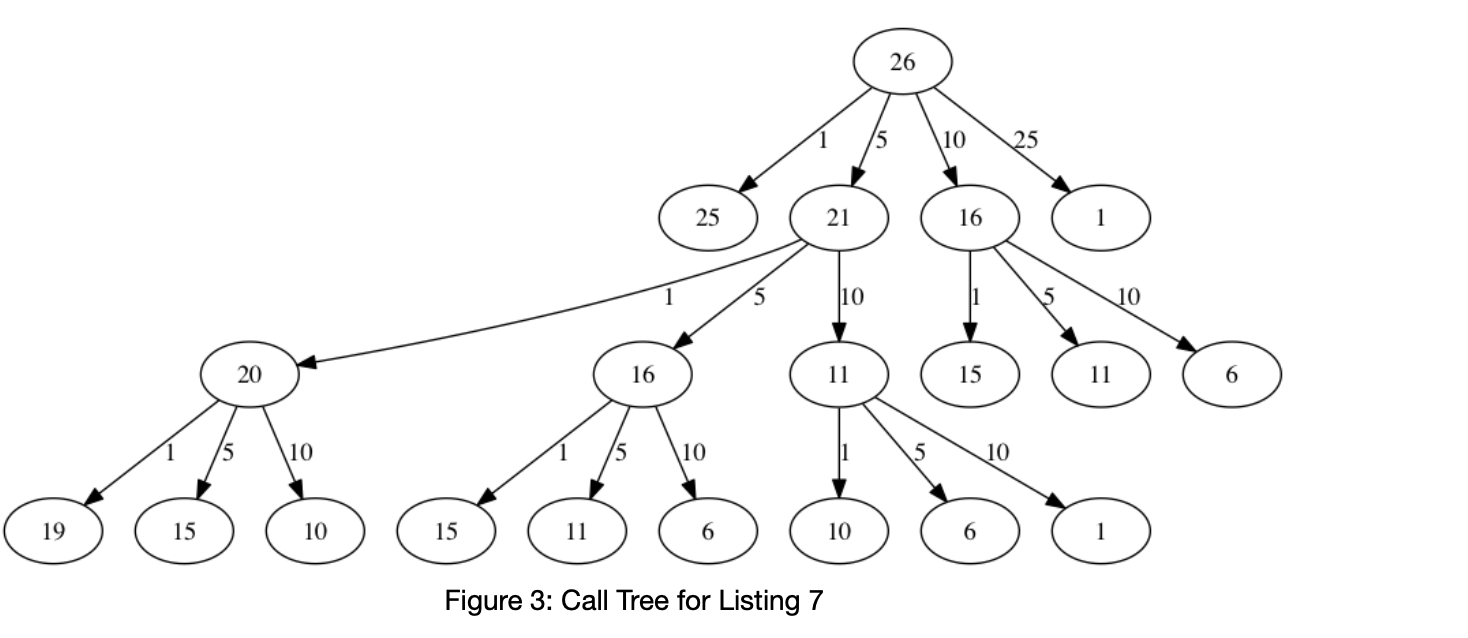

In [135]:
# Just Recursive Solution (Takes really long to run)

coinsUSD = [1,5,10,25]

def changeCoins(amount: int, coin_denoms: list[int]):
    minCoin = amount
    minChange = []
    if amount in coin_denoms:
        return [amount]
    for coin in [coin_denom for coin_denom in coin_denoms if coin_denom < amount]:
        change = [coin] + changeCoins(amount - coin, coin_denoms)
        if change and len(change) <= minCoin:
            minCoin = len(change)
            minChange = change
    return minChange


print(changeCoins(67, coinsUSD))

[25, 25, 10, 5, 1, 1]


## Recursion With Memoization (Top-Down Dynamic Programming)
* The above recursion was really slow because it required calculating all the sub-problems i.e the optimal change for the smaller amounts
* Some of these sub-problems have been recalculated multiple times
* to improve this algorithm, we could add in a memorization step: store solutions to sub-problems in a list that we can later referance i.e caching
* we can easily add another base case for if the solution to sub-problem is already memorized, we can pull that value instead of recalculating
* this technique is called "memoization"
* Time Complexity: $O(N)$
  * We'll need to calculate up to N subproblems with recursion
  * but because we only have to calculate each subproblem once, it does not add to time complexity
* Space Complexity: $O(N^2)$
  * you need an array of size N, with each item being an array solving for the $i^{th}$ amount
  * worst case scenario, the solution is all pennies for each item so space required is an arithmetic sequence e.g N+(N-1)+(N-2)+...1
  * solving for space complexity using sum of arithmetic sequence equation yields $O(N* \frac{1+N}{2}) = O(N^2)$
  * so, we end up sacrificing a bit of space complexity for reducing time

$$
\sum_{i=1}^{N} x_i = N * \frac{1+N}{2}
$$
  


In [72]:
# The Memoization Version

coinsUSD = [1,5,10,25]
coinsLowerElbonia = [1,5,10,21,25]

def changeCoins(amount, coin_denoms, solutions):
    minCoin = amount
    minChange = []
    if amount in coin_denoms:
        return [amount]
    if solutions[amount]:
        return solutions[amount]
    
    for coin in [coin_denom for coin_denom in coin_denoms if coin_denom < amount]:
        change = [coin] + changeCoins(amount - coin, coin_denoms, solutions)
        if change and len(change) <= minCoin:
            minCoin = len(change)
            minChange = change
            solutions[amount] = minChange
    return minChange

def makeChangeMemoization(amount, coin_denoms):
    solutions = [[] for i in range(amount+1)]
    return changeCoins(amount, coin_denoms, solutions)

print(makeChangeMemoization(63, coinsUSD))
print(makeChangeMemoization(63, coinsLowerElbonia))

[25, 25, 10, 1, 1, 1]
[21, 21, 21]


# Bottom Up Dynamic Programming (With Tabulation)
* Recursion and memoization had a top-to-bottom approach:
    * we started off trying to solve the entire problem
    * in the process, we broke the problem into smaller subproblems we can solve
    * once we can no longer break down the problem, we summed up all the subproblem solutions to get our final answer
* Dynamic Programming instead tries a bottom-up approach:
    * initially, we assume that the minimum change is all in the smallest denomination (1 cent coins)
    * we start with how do we make change for 1 cents
    * then 2, then 3, and so on until we get to the amount we really want
    * for each step, we try to use solutions for previous steps to build the solution for the subproblem. In this case:
        * we go through each available denomination smaller than the subamount
        * we check if there is change for the subamount minus the denomination, then add the coin. This creates another solution for the subamount
        * we check if the length of the other solution is smaller than the current solution. If so, we'll replace the current solution with the other solution
        * we keep doing this until we reach the amount we need
    * a lot faster because we can replace recursion with loops (typically $O(n^i)$, i=levels of nesting)
    * Time complexity: $O(n)$ 
        * the outer loop iterates over "amount" (the problem space which is N)
        * the inner loop iterates over the length of "coin_denom" which is a constant C
            * C <= 5 for coinsUSD
        * $O(N*C)$ simplifies to $O(n)$ 
    * Space Complexity: $O(n^2)$, still sacrificing space for better time complexity
        * you need an array of size N, with each item being an array solving for the $i^{th}$ amount
        * worst case scenario, the solution is all pennies for each item so space required is an arithmetic sequence e.g N+(N-1)+(N-2)+...1
        * solving for space complexity using sum of arithmetic sequence equation yields $O(N* \frac{1+N}{2}) = O(N^2)$

$$
\sum_{i=1}^{N} x_i = N * \frac{1+N}{2}
$$
    



In [131]:
# Bottom-up Dynamic Programming approach

coinsUSD = [1,5,10,25]
coinsLowerElbonia = [1,5,10,21,25]

def makeChangeDP(amount, coins):
    solution = [[] for i in range(amount+1)]
    for cents in range(amount+1):
        solution[cents] = [1] * cents
        for coin in [coin for coin in coins if coin <= cents]:
            if len(solution[cents-coin]) + 1 < len(solution[cents]):
                solution[cents] = solution[cents-coin] + [coin]
    return solution[-1]

print(makeChangeDP(63, coinsUSD))
print(makeChangeDP(63, coinsLowerElbonia))


[25, 25, 10, 1, 1, 1]
[21, 21, 21]


# Space Optimized Dynamic Programming
* Instead of storing an array of sub-solutions for each sub-amount, we are going to create two new arrays of size N:
    * min_coins: stores the minimum number of coins to solve each sub-problem
    * last_coin: the last coin added to make change for the sub-problem 
* Both arrays use backtracking to keep track of sub-solutions
    * To derive the solution at any particular index, you need to build it from the sub-solutions in the previous elements of the array
    * You can find the sub-solution at an index by subtracting a coin value from the current index. 
* We need the min_coin array, so that we don't have to do further calculations to figure out if adding a certain coin yields a better solution than the one we currently have
* We need the last_coin array so that we can find the exact coins needed for change by backtracking through the sub-solutions
* Time Complexity: $O(N*C) = O(N)$ ;outer loop is N and inner loop is C (treating the length of coins array is constant)
* Space Complexity: $O(N)$ ; each array is going to be size N and the number of arrays we're using is constant 

    


In [134]:
# Space Optimized Dynamic Programming Approach
#WIP
coinsUSD = [1,5,10,25]
coinsLowerElbonia = [21,1,5,10,25]

def makeChangeDP(amount, coins):
    min_coins = [i for i in range(amount+1)]
    last_coin = [0] * (amount + 1)
    solution = []

    for cents in range(1, amount+1):
        for coin in [coin for coin in coins if coin <= cents]:
            if min_coins[cents-coin] + 1 < min_coins[cents]:
                min_coins[cents] = min_coins[cents-coin] + 1
                last_coin[cents] = coin

    remainder = amount
    for i in range(min_coins[-1]):
        coin = last_coin[remainder]
        solution.append(coin)
        remainder -= coin

    return solution



print(makeChangeDP(32,coinsLowerElbonia))

    


[21, 1, 10]
